In [2]:
import pandas as pd
from time import time

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [53]:
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

# Loading Data

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ["sepal-length", "sepal-width", "petal-length", "petal-width", "class"]
dataset = pd.read_csv(url, names=names)

In [4]:
array = dataset.values
X = array[:, 0:4]
Y = array[:, 4]
validation_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size,
                                                                                random_state=seed)

# Parallelization

In [12]:
parameters = [
    {"min_samples_leaf": [1, 6, 8, 12, 20]}
 ]

jobs = []
times = []
for n_jobs in range(1, 10):
    clf = GridSearchCV(estimator=RandomForestClassifier(), n_jobs=n_jobs, scoring="accuracy", param_grid=parameters)
    t0 = time()
    clf.fit(X,Y)
    times.append(time() - t0)
    jobs.append(n_jobs)

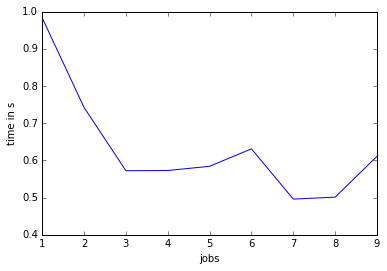

In [13]:
df = pd.DataFrame({
        "jobs": jobs,
        "times": times
})
ax = df.plot(x="jobs", y="times", legend=False)
ax.set_ylabel("time in s")

# Plotting Hyperparameters

In [14]:
parameters = [
    {"min_samples_leaf": [1, 6, 8, 12, 20]}
 ]


clf = GridSearchCV(estimator=RandomForestClassifier(), n_jobs=4, scoring="accuracy", param_grid=parameters)
clf.fit(X,Y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'min_samples_leaf': [1, 6, 8, 12, 20]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [46]:
params = []
scores = []
for score in clf.grid_scores_:
    params.append(score.parameters['min_samples_leaf'])
    scores.append(score.mean_validation_score)

/smartdata/uxcyy/.conda/envs/test/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


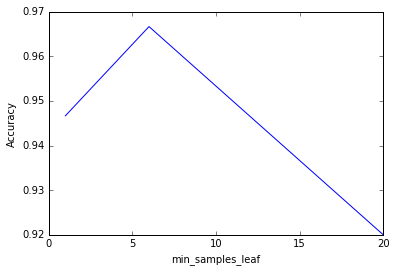

In [52]:
plt.plot(params, scores)
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")